# Pandas 2
## Unstack

In [2]:
# 데이터셋 2개
import pandas as pd

casts = pd.read_csv('Sample2/cast.csv', index_col=None)
casts.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [3]:
titles = pd.read_csv('Sample2/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [7]:
c = casts
c_decade = c.groupby(['type', c['year']//10*10]).size()
c_decade

type     year
actor    1910      384
         1920      710
         1930     2628
         1940     3014
         1950     2877
         1960     2775
         1970     3044
         1980     3565
         1990     5108
         2000    10368
         2010    15523
         2020        4
actress  1910      285
         1920      411
         1930      820
         1940      983
         1950     1015
         1960      968
         1970     1299
         1980     1989
         1990     2544
         2000     5831
         2010     8853
         2020        3
dtype: int64

In [8]:
# unstack : index를 기반으로 새로운 DataFrame 생성
c_decade.unstack()

year,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
type,,,,,,,,,,,,
actor,384,710,2628,3014,2877,2775,3044,3565,5108,10368,15523,4
actress,285,411,820,983,1015,968,1299,1989,2544,5831,8853,3


<AxesSubplot:xlabel='type'>

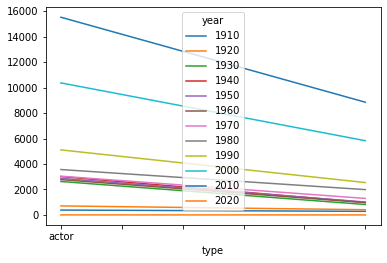

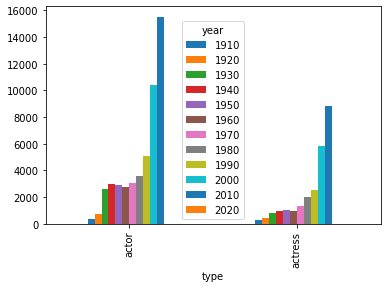

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
c_decade.unstack().plot()
c_decade.unstack().plot(kind='bar')

In [11]:
c_decade.unstack(0)

type,actor,actress
year,,
1910,384,285
1920,710,411
1930,2628,820
1940,3014,983
1950,2877,1015
1960,2775,968
1970,3044,1299
1980,3565,1989
1990,5108,2544


<AxesSubplot:xlabel='year'>

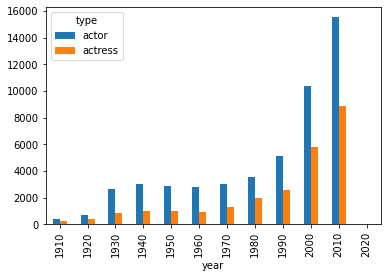

In [12]:
c_decade.unstack(0).plot(kind='bar')

## Merge : SQL에서 Join과 비슷한 기능

In [18]:
release = pd.read_csv('./Sample2/release_dates.csv', index_col=None)
release.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Declimax,2018,Netherlands,2018-01-21
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Horror,2015,USA,2015-11-20


In [19]:
c_amelia = casts[casts['title']=='Amelia']
c_amelia.head()

,title,year,name,type,character,n
5767,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0
23319,Amelia,2009,Jeremy Akerman,actor,Sheriff,19.0


In [20]:
release[release['title']=='Amelia'].head()

,title,year,country,date
20543,Amelia,1966,Mexico,1966-03-10
20544,Amelia,2009,Canada,2009-10-23
20545,Amelia,2009,USA,2009-10-23
20546,Amelia,2009,Australia,2009-11-12
20547,Amelia,2009,Singapore,2009-11-12


In [25]:
c_amelia.merge(release).head()

,title,year,name,type,character,n,country,date
0,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Canada,2009-10-23
1,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,USA,2009-10-23
2,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Australia,2009-11-12
3,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Singapore,2009-11-12
4,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Ireland,2009-11-13


In [26]:
c = casts[casts['name']=='Aaron Abrams']
c.head()

,title,year,name,type,character,n
5765,#FromJennifer,2017,Aaron Abrams,actor,Ralph Sinclair,NaN
5766,388 Arletta Avenue,2011,Aaron Abrams,actor,Alex,4.0
5767,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0
5768,At Home by Myself... with You,2009,Aaron Abrams,actor,Guy,2.0
5769,Cinderella Man,2005,Aaron Abrams,actor,1928 Fan,67.0


In [27]:
c.merge(casts, on=['title', 'year']).head()

,title,year,name_x,type_x,character_x,n_x,name_y,type_y,character_y,n_y
0,#FromJennifer,2017,Aaron Abrams,actor,Ralph Sinclair,NaN,Aaron Abrams,actor,Ralph Sinclair,NaN
1,#FromJennifer,2017,Aaron Abrams,actor,Ralph Sinclair,NaN,Christian Ackerman,actor,Simon,NaN
2,388 Arletta Avenue,2011,Aaron Abrams,actor,Alex,4.0,Graham Abbey,actor,Officer #2,8.0
3,388 Arletta Avenue,2011,Aaron Abrams,actor,Alex,4.0,Aaron Abrams,actor,Alex,4.0
4,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Aaron Abrams,actor,Slim Gordon,8.0


## Set_Index

In [29]:
cast = pd.read_csv('./Sample2/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [30]:
%%time

cast[cast['title']=='Macbeth']

Wall time: 11 ms


,title,year,name,type,character,n
12868,Macbeth,2015,Darren Adamson,actor,Soldier,NaN
22302,Macbeth,1916,Spottiswoode Aitken,actor,Duncan,4.0
25855,Macbeth,1948,Robert Alan,actor,Third Murderer,NaN
26990,Macbeth,2016,John Albasiny,actor,Doctor,NaN
38090,Macbeth,1948,William Alland,actor,Second Murderer,18.0
40639,Macbeth,1997,Stevie Allen,actor,Murderer,21.0
60543,Macbeth,2014,Moyo Akand?,actress,Witch,NaN
63776,Macbeth,1916,Mary Alden,actress,Lady Macduff,6.0


In [32]:
%%timeit # 여러 번 실행한 후 평균시간을 표시: 정확한 결과를 위해 사용 가능함 (*shell은 출력 되지 않음)

cast[cast['title']=='Macbeth']

7.21 ms ± 128 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [33]:
c = cast.set_index(['title'])
c.head()

,year,name,type,character,n
title,,,,,
Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
Suuri illusioni,1985,Homo $,actor,Guests,22.0
Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [34]:
%%time

c.loc['Macbeth']

Wall time: 25.8 ms


,year,name,type,character,n
title,,,,,
Macbeth,2015,Darren Adamson,actor,Soldier,NaN
Macbeth,1916,Spottiswoode Aitken,actor,Duncan,4.0
Macbeth,1948,Robert Alan,actor,Third Murderer,NaN
Macbeth,2016,John Albasiny,actor,Doctor,NaN
Macbeth,1948,William Alland,actor,Second Murderer,18.0
Macbeth,1997,Stevie Allen,actor,Murderer,21.0
Macbeth,2014,Moyo Akand?,actress,Witch,NaN
Macbeth,1916,Mary Alden,actress,Lady Macduff,6.0


In [35]:
%%timeit

c.loc['Macbeth']

2.4 ms ± 116 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [36]:
cm = cast.set_index(['title', 'n']).sort_index()
cm.tail()

year           name     type  \
title                      n                                     
w Delta z                  8.0    2007  Barbara Adair  actress   
xXx: Return of Xander Cage 34.0   2017  Wayne Ambrose    actor   
                           64.0   2017    Jeimi Abila  actress   
                           84.0   2017   Julie Abcede    actor   
xXx: State of the Union    NaN    2005  Robert Alonzo    actor   

                                         character  
title                      n                        
w Delta z                  8.0       Alice Jackson  
xXx: Return of Xander Cage 34.0      Choir Members  
                           64.0     Lazarus' Girls  
                           84.0   Catwalk Partiers  
xXx: State of the Union    NaN               Guard

In [37]:
cm.loc['Macbeth'].loc[4:18]

,year,name,type,character
n,,,,
4.0,1916,Spottiswoode Aitken,actor,Duncan
6.0,1916,Mary Alden,actress,Lady Macduff
18.0,1948,William Alland,actor,Second Murderer


## Reset_index

In [38]:
cm.head()

year                name     type  \
title               n                                          
#1 Serial Killer    17.0   2013       Michael Alton    actor   
#DigitalLivesMatter NaN    2016          Rashan Ali  actress   
#FromJennifer       NaN    2017        Aaron Abrams    actor   
                    NaN    2017  Christian Ackerman    actor   
#Horror             1.0    2015          Emma Adler  actress   

                                   character  
title               n                         
#1 Serial Killer    17.0   Detective Roberts  
#DigitalLivesMatter NaN        News Reporter  
#FromJennifer       NaN       Ralph Sinclair  
                    NaN                Simon  
#Horror             1.0              Georgie

In [39]:
cm = cm.reset_index('n')
cm.head()

,n,year,name,type,character
title,,,,,
#1 Serial Killer,17.0,2013,Michael Alton,actor,Detective Roberts
#DigitalLivesMatter,NaN,2016,Rashan Ali,actress,News Reporter
#FromJennifer,NaN,2017,Aaron Abrams,actor,Ralph Sinclair
#FromJennifer,NaN,2017,Christian Ackerman,actor,Simon
#Horror,1.0,2015,Emma Adler,actress,Georgie


## Implement using Python-CSV library

In [1]:
import csv
titles = list(csv.DictReader(open('./Sample2/titles.csv')))
titles[0:5]

[{'title': 'The Rising Son', 'year': '1990'},
 {'title': 'The Thousand Plane Raid', 'year': '1969'},
 {'title': 'Crucea de piatra', 'year': '1993'},
 {'title': 'Country', 'year': '2000'},
 {'title': 'Gaiking II', 'year': '2011'}]

In [2]:
titles[-5:]

[{'title': 'Rebel', 'year': '1970'},
 {'title': 'Suzanne', 'year': '1996'},
 {'title': 'Bomba', 'year': '2013'},
 {'title': 'Aao Jao Ghar Tumhara', 'year': '1984'},
 {'title': 'Mrs. Munck', 'year': '1995'}]

In [4]:
for k, v in titles[0].items():
    print(k, ':', v)

title : The Rising Son
year : 1990


In [5]:
year85 = [a for a in titles if a['year']=='1985']
year85[:5]

[{'title': 'Insaaf Main Karoonga', 'year': '1985'},
 {'title': 'Vivre pour survivre', 'year': '1985'},
 {'title': 'Water', 'year': '1985'},
 {'title': 'Doea tanda mata', 'year': '1985'},
 {'title': 'Koritsia gia tsibima', 'year': '1985'}]

In [6]:
movies90 = [m for m in titles if (int(m['year']) < 2000) and (int(m['year']) > 1989)]
movies90[:5]

[{'title': 'The Rising Son', 'year': '1990'},
 {'title': 'Crucea de piatra', 'year': '1993'},
 {'title': 'Poka Makorer Ghar Bosoti', 'year': '1996'},
 {'title': 'Maa Durga Shakti', 'year': '1999'},
 {'title': 'Conflict of Interest', 'year': '1993'}]

In [9]:
macbeth = [m for m in titles if m['title']=='Macbeth']
macbeth[:3]

[{'title': 'Macbeth', 'year': '1913'},
 {'title': 'Macbeth', 'year': '2006'},
 {'title': 'Macbeth', 'year': '2013'}]

In [10]:
from operator import itemgetter
sorted(macbeth, key=itemgetter('year'))[:5]

[{'title': 'Macbeth', 'year': '1913'},
 {'title': 'Macbeth', 'year': '1997'},
 {'title': 'Macbeth', 'year': '1998'},
 {'title': 'Macbeth', 'year': '2006'},
 {'title': 'Macbeth', 'year': '2013'}]

In [11]:
# Replace empty string with 0
casts = list(csv.DictReader(open('./Sample2/cast.csv')))
casts[3:5]

[{'title': 'Secret in Their Eyes',
  'year': '2015',
  'name': '$hutter',
  'type': 'actor',
  'character': '2002 Dodger Fan',
  'n': ''},
 {'title': 'Steve Jobs',
  'year': '2015',
  'name': '$hutter',
  'type': 'actor',
  'character': '1988 Opera House Patron',
  'n': ''}]

In [12]:
cast0 = [{**c, 'n':c['n'].replace('', '0')} for c in casts]
cast0[3:5]

[{'title': 'Secret in Their Eyes',
  'year': '2015',
  'name': '$hutter',
  'type': 'actor',
  'character': '2002 Dodger Fan',
  'n': '0'},
 {'title': 'Steve Jobs',
  'year': '2015',
  'name': '$hutter',
  'type': 'actor',
  'character': '1988 Opera House Patron',
  'n': '0'}]

In [13]:
# collections Counter
from collections import Counter
by_year = Counter(t['year'] for t in titles)
by_year.most_common(3)

[('2016', 2363), ('2017', 2138), ('2015', 1849)]

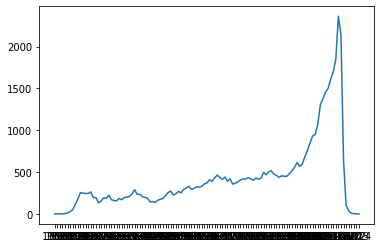

In [14]:
import matplotlib.pyplot as plt
data = by_year.most_common(len(titles))
data = sorted(data)

x = [c[0] for c in data]
y = [c[1] for c in data]
plt.plot(x, y)

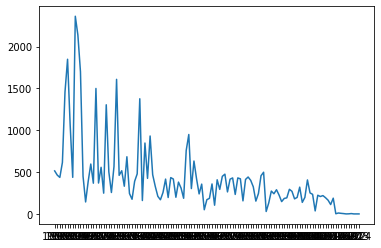

In [17]:
# collections defaultdict
from collections import defaultdict

d = defaultdict(list)
for row in titles:
    d[row['year']].append(row['title'])
# print(d)
xx = []
yy = []

for k, v in d.items():
    xx.append(k)
    yy.append(len(v))

plt.plot(sorted(xx), yy)